## Importando los paquetes necesarios

In [1]:
#import opendatasets as od # no para python 3.13
import pandas as pd
import os
import zipfile
import matplotlib.pyplot as plt
from matplotlib.image import imread
import random

from os import listdir
import shutil
import numpy as np
import keras.preprocessing.image as kerasImg
import keras.layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import ops



/Users/danielmachic/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
folder = "/Users/danielmachic/Desktop/Data Science/CNN/archive/PolyMNIST/MMNIST/train/m0/"

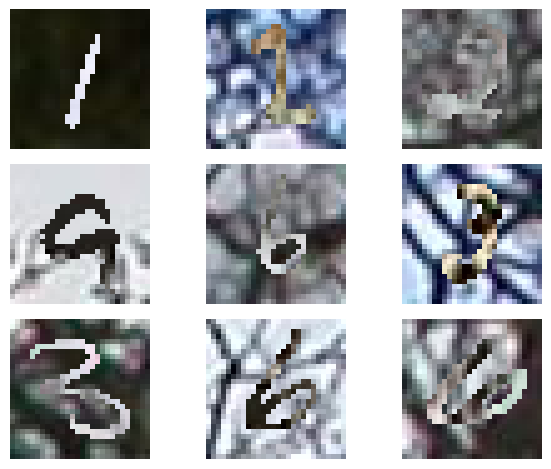

In [5]:
for i, img_name in enumerate(os.listdir(folder)[:9]):
    plt.subplot(330 + 1 + i)
    image = imread(os.path.join(folder, img_name))
    plt.imshow(image)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [6]:
base_folder = "/Users/danielmachic/Desktop/Data Science/CNN/archive/PolyMNIST/MMNIST/"
train_folder = os.path.join(base_folder, "train")
test_folder = os.path.join(base_folder, "test")

In [7]:
import os
import shutil
import random

# Ruta base de los datos originales
src_base = "/Users/danielmachic/Desktop/Data Science/CNN/archive/PolyMNIST/MMNIST/train/"
# Ruta base para el nuevo conjunto organizado
dest_base = "/Users/danielmachic/Desktop/Data Science/CNN/PolyMNIST_CNN/"

# Subcarpetas nuevas
subdirs = ['train/', 'val/']
modalities = ['m0', 'm1', 'm2', 'm3', 'm4']

# Crear carpetas destino
for subdir in subdirs:
    for modality in modalities:
        newdir = os.path.join(dest_base, subdir, modality)
        os.makedirs(newdir, exist_ok=True)

# Fijar semilla para reproducibilidad
random.seed(1)

# Proporción de validación
val_ratio = 0.25

# Copiar imágenes a train/ o val/ según proporción
for modality in modalities:
    src_dir = os.path.join(src_base, modality)
    images = os.listdir(src_dir)
    for img_name in images:
        if random.random() < val_ratio:
            dest_dir = os.path.join(dest_base, 'val', modality)
        else:
            dest_dir = os.path.join(dest_base, 'train', modality)

        src_path = os.path.join(src_dir, img_name)
        dest_path = os.path.join(dest_dir, img_name)

        try:
            shutil.copy2(src_path, dest_path)
        except Exception as e:
            print(f"Error copiando {img_name}: {e}")

### Cargar todas en memoria

In [8]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import os

# Carpetas base
base_path = "/Users/danielmachic/Desktop/Data Science/CNN/PolyMNIST_CNN/"
train_path = os.path.join(base_path, "train")
val_path = os.path.join(base_path, "val")

# Preparar contenedores
fotos_train = []
etiquetas_train = []
fotos_val = []
etiquetas_val = []

# Dimensiones deseadas
target_size = (64, 64)

# Mapear m0 → 0, m1 → 1, ..., m4 → 4
modalities = ['m0', 'm1', 'm2', 'm3', 'm4']
modality_to_label = {mod: i for i, mod in enumerate(modalities)}

# Cargar imágenes de entrenamiento
for mod in modalities:
    mod_dir = os.path.join(train_path, mod)
    for file in os.listdir(mod_dir):
        img_path = os.path.join(mod_dir, file)
        image = load_img(img_path, target_size=target_size)
        image = img_to_array(image)
        fotos_train.append(image)
        etiquetas_train.append(modality_to_label[mod])

# Cargar imágenes de validación
for mod in modalities:
    mod_dir = os.path.join(val_path, mod)
    for file in os.listdir(mod_dir):
        img_path = os.path.join(mod_dir, file)
        image = load_img(img_path, target_size=target_size)
        image = img_to_array(image)
        fotos_val.append(image)
        etiquetas_val.append(modality_to_label[mod])

# Convertir a arrays de numpy
fotos_train = np.asarray(fotos_train)
etiquetas_train = np.asarray(etiquetas_train)
fotos_val = np.asarray(fotos_val)
etiquetas_val = np.asarray(etiquetas_val)

print("Train:", fotos_train.shape, etiquetas_train.shape)
print("Val:  ", fotos_val.shape, etiquetas_val.shape)

Train: (224641, 64, 64, 3) (224641,)
Val:   (75359, 64, 64, 3) (75359,)


In [9]:
np.save("/Users/danielmachic/Desktop/Data Science/CNN/polyMNIST_photos_train.npy", fotos_train)
np.save("/Users/danielmachic/Desktop/Data Science/CNN/polyMNIST_labels_train.npy", etiquetas_train)

np.save("/Users/danielmachic/Desktop/Data Science/CNN/polyMNIST_photos_val.npy", fotos_val)
np.save("/Users/danielmachic/Desktop/Data Science/CNN/polyMNIST_labels_val.npy", etiquetas_val)

In [10]:
fotos_train = np.load("/Users/danielmachic/Desktop/Data Science/CNN/polyMNIST_photos_train.npy")
etiquetas_train = np.load("/Users/danielmachic/Desktop/Data Science/CNN/polyMNIST_labels_train.npy")

fotos_val = np.load("/Users/danielmachic/Desktop/Data Science/CNN/polyMNIST_photos_val.npy")
etiquetas_val = np.load("/Users/danielmachic/Desktop/Data Science/CNN/polyMNIST_labels_val.npy")

print("Train:", fotos_train.shape, etiquetas_train.shape)
print("Val:  ", fotos_val.shape, etiquetas_val.shape)

Train: (224641, 64, 64, 3) (224641,)
Val:   (75359, 64, 64, 3) (75359,)


## Análisis Exploratorio
Veamos si el conjunto de datos está balanceado

In [11]:
from tensorflow.keras.utils import to_categorical

# Asumiendo que tus etiquetas son 0 a 4
etiquetas_train_ohe = to_categorical(etiquetas_train, num_classes=5)
etiquetas_val_ohe = to_categorical(etiquetas_val, num_classes=5)

In [12]:
from tensorflow import keras

modelo1 = keras.Sequential()
modelo1.add(keras.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(64, 64, 3)))
modelo1.add(keras.layers.MaxPooling2D((2,2)))
modelo1.add(keras.layers.Flatten())
modelo1.add(keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
modelo1.add(keras.layers.Dense(5, activation='softmax'))  # ← 5 clases

# Compilar el modelo
opt = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
modelo1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

modelo1.summary()

/Users/danielmachic/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,195,973 (16.01 MB)

 Trainable params: 4,195,973 (16.01 MB)

 Non-trainable params: 0 (0.00 B)

#### Entrenamos el modelo

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Ruta a tus carpetas
data_folder = "/Users/danielmachic/Desktop/Data Science/CNN/PolyMNIST_CNN/"

# Crear generador con normalización
datagen = ImageDataGenerator(rescale=1.0/255.0)

# Generadores de entrenamiento y validación
train_it = datagen.flow_from_directory(
    directory=os.path.join(data_folder, "train"),
    class_mode='categorical',
    batch_size=64,
    target_size=(64, 64)
)

val_it = datagen.flow_from_directory(
    directory=os.path.join(data_folder, "val"),
    class_mode='categorical',
    batch_size=64,
    target_size=(64, 64)
)

history = modelo1.fit(
    train_it,
    steps_per_epoch=train_it.samples // train_it.batch_size,
    validation_data=val_it,
    validation_steps=val_it.samples // val_it.batch_size,
    epochs=5,
    verbose=True
)
modelo1.save("/Users/danielmachic/Desktop/Data Science/CNN/modelo_polyMNIST.keras")

Found 224641 images belonging to 5 classes.
Found 75359 images belonging to 5 classes.
Epoch 1/5


/Users/danielmachic/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3510/3510 ━━━━━━━━━━━━━━━━━━━━ 104s 30ms/step - accuracy: 0.9009 - loss: 0.2862 - val_accuracy: 0.9864 - val_loss: 0.0366
Epoch 2/5
   1/3510 ━━━━━━━━━━━━━━━━━━━━ 1:12 21ms/step - accuracy: 0.9688 - loss: 0.0497

/Users/danielmachic/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


3510/3510 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9688 - loss: 0.0497 - val_accuracy: 0.9841 - val_loss: 0.0416
Epoch 3/5
3510/3510 ━━━━━━━━━━━━━━━━━━━━ 110s 31ms/step - accuracy: 0.9880 - loss: 0.0350 - val_accuracy: 0.9951 - val_loss: 0.0147
Epoch 4/5
3510/3510 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 1.0000 - loss: 6.8047e-04 - val_accuracy: 0.9947 - val_loss: 0.0154
Epoch 5/5
3510/3510 ━━━━━━━━━━━━━━━━━━━━ 110s 31ms/step - accuracy: 0.9941 - loss: 0.0179 - val_accuracy: 0.9956 - val_loss: 0.0129


#### Validamos resultados

In [17]:
# Evaluación
loss, acc = modelo1.evaluate(val_it, steps=len(val_it), verbose=1)
print('> %.3f' % (acc * 100.0))

1178/1178 ━━━━━━━━━━━━━━━━━━━━ 23s 20ms/step - accuracy: 0.9958 - loss: 0.0128
> 99.565


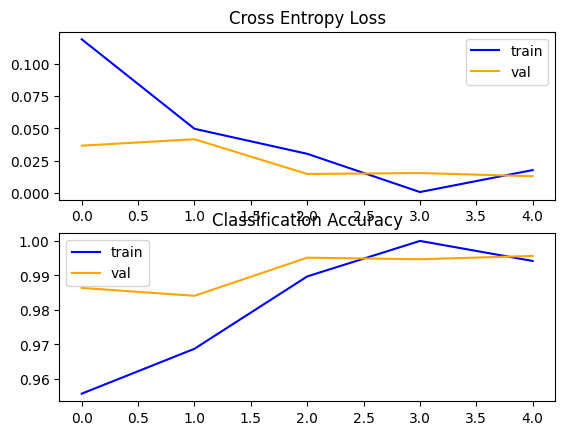

In [18]:
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='val')
plt.legend()

plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='val')
plt.legend()

Como se puede observar, el modelo presenta un desempeño excelente. El accuracy alcanza aproximadamente un 99.5% tanto en el conjunto de entrenamiento como en el de validación. En las gráficas se muestran la pérdida y la exactitud para ambos conjuntos: entrenamiento (azul) y validación (naranja).

En el gráfico de la pérdida (loss), esta disminuye rápidamente durante las primeras épocas y se estabiliza en valores muy bajos, lo cual indica que el modelo está aprendiendo de manera efectiva sin señales claras de sobreajuste. Por otro lado, en la exactitud (accuracy), se observa un crecimiento constante durante las primeras épocas hasta alcanzar una meseta muy cercana al 100%.

Esto sugiere que el modelo ha logrado generalizar bien a los datos de validación y que entrenarlo por más épocas probablemente no genere mejoras significativas. El comportamiento de las curvas indica un buen balance entre el aprendizaje y la capacidad de generalización.

### Arquitecturas
Usemos una arquitectura VGG de 2 bloques y veamos que sucede

In [19]:
from tensorflow import keras

# Arquitectura tipo VGG con 2 bloques convolucionales
modelo2 = keras.Sequential()

# Primer bloque VGG
modelo2.add(keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(64, 64, 3)))
modelo2.add(keras.layers.MaxPooling2D((2, 2)))

# Segundo bloque VGG
modelo2.add(keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
modelo2.add(keras.layers.MaxPooling2D((2, 2)))

# Capas densas
modelo2.add(keras.layers.Flatten())
modelo2.add(keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
modelo2.add(keras.layers.Dense(10, activation='softmax'))  # 10 clases

# Compilación del modelo
opt = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
modelo2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
modelo2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,117,962 (8.08 MB)

 Trainable params: 2,117,962 (8.08 MB)

 Non-trainable params: 0 (0.00 B)